# libs

In [1]:
import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
from vis import *


np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(12344)
# sz = 420 # for mobileNet_v2
sz = 299 # for inception_v3

In [2]:
a=torch.cuda.FloatTensor()

In [3]:
use_gpu = torch.cuda.is_available()
use_gpu

True

# dataset class

In [4]:
from natsort import natsorted
import glob

class AngleDataset(Dataset):
    def __init__(self, img_dir, angles_addr, transforms, sz=sz):
        """ Prepare fish dataset
        
        Inputs:
            img_dir: drirectory of images
            joints: an array containing the angle of each images
            transforms: required transformations on each image
        """
        self.img_dir = img_dir
        items = glob.glob(img_dir+"/*.jpg")
        self.img_names = natsorted(items)

        with open(angles_addr, 'r') as file:
            angles = file.read().split('\n')

        self.angles = angles
        self.sz = sz
        self.tfms = transforms
    
    def __getitem__(self, index):
        
        # print(index ," ggg ", self.angles[index])
        angle = float(self.angles[index].split(" ")[-1])
     
        image = Image.open( self.img_names[index]).convert('RGB')
     
        image = self.tfms(image)
        
    
        # return image tensor, label tensor and bounding box tensor
        return image, torch.Tensor([angle])
    
    def __len__(self):
        return len(self.img_names)

In [5]:
items = glob.glob("DS/train_all/*.jpg")
items = natsorted(items)
len(items)
items[0]

'DS/train_all\\0_ang.jpg'

In [6]:
with open('DS/train_all/train_angles.txt', 'r') as file:
    lines = file.read().split('\n')

len(lines)
# lines
float(lines[0].split(" ")[-1])

0.0

# transform and data loader

In [7]:
train_transforms = transforms.Compose([
    transforms.Resize((int(sz * 1.05), int(sz * 1.05))),
    transforms.RandomCrop((sz, sz)),
    # transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(0.1, 0.1, 0.1, 0.01),
    # transforms.RandomRotation(60),
    # transforms.RandomVerticalFlip(p=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Just normalization for validation
val_transforms = transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


train_ds = AngleDataset("DS/train_all" , "DS/train_all/train_angles.txt" , train_transforms , sz=sz)
val_ds = AngleDataset("DS/valid_all" , "DS/valid_all/valid_angles.txt"  ,val_transforms , sz=sz)
test_ds = AngleDataset("DS/test_all" , "DS/test_all/angles_test.txt"  ,val_transforms , sz=sz)

train_dl = DataLoader(train_ds, batch_size=100, shuffle=True) # bs = 40
valid_dl = DataLoader(val_ds, batch_size=100, shuffle=False )
test_dl = DataLoader(test_ds, batch_size=100, shuffle=False )


In [8]:
train_ds[2][1][0]

tensor(-1.)

In [9]:
len(train_ds), len(val_ds) , len(test_ds)

(162176, 37914, 15239)

In [10]:
inputs, targets = next(iter(valid_dl))

In [11]:
targets.shape

torch.Size([100, 1])

In [12]:
# import cv2
# inputs[0,0].shape
# cv2.imwrite("tt.jpg" ,inputs[1,0].numpy()*255 )

# model architecture

In [13]:

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.mobilenet_v2(weights="DEFAULT")

# ii=1
# for param in model.parameters():
#     if ii < 0:
#         param.requires_grad = False
#     ii+=1

    
# model.classifier[1] = nn.Sequential(
#     nn.Dropout(p = 0.2),nn.Linear(1280, 500), nn.ReLU(),nn.Dropout(p = 0.5) ,  nn.Linear(500, 1)
# )

# model.to(device)




device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torchvision.models.inception_v3(weights="DEFAULT")

ii=1
for param in model.parameters():
    if ii < 0:
        param.requires_grad = False
    ii+=1

    
model.fc = nn.Sequential( # 1500 , 600 , 1
    nn.Dropout(p = 0.1),nn.Linear(2048, 1500), nn.ReLU(),nn.Dropout(p = 0.3) ,nn.Linear(1500, 600), nn.ReLU(),nn.Dropout(p = 0.3) , nn.Linear(600, 1)
)

model.to(device)
print()

In [14]:
ii=1
for param in model.parameters():
    print(ii , param.requires_grad)
    ii+=1

1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 True
67 True
68 True
69 True
70 True
71 True
72 True
73 True
74 True
75 True
76 True
77 True
78 True
79 True
80 True
81 True
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 True
102 True
103 True
104 True
105 True
106 True
107 True
108 True
109 True
110 True
111 True
112 True
113 True
114 True
115 True
116 True
117 True
118 True
119 True
120 True
121 True
122 True
123 True
1

In [15]:
pytorch_total_params =  sum(p.numel() for p in model.parameters() if p.requires_grad)

In [16]:
pytorch_total_params

29086965

# loss-function, optimizer and validation method

In [17]:
import sys  


learning_rate = 1e-3 
num_epochs = 200
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



# Check accuracy on training & test to see how good our model

def validate_model(model, dataloder, criterion, device):
    model.eval()
    
    steps = len(dataloder.dataset) // dataloder.batch_size
    
    running_loss = 0.0
    running_loc_loss = 0.0
    
    c = 0 
    with torch.no_grad():
        for i, (inputs, angles) in enumerate(dataloder):   # batch batch 
            c+=1
            inputs, angles = inputs.to(device),  angles.to(device)

            # forward
            locs = model(inputs)
            locs.size()
            loc_loss = criterion( locs, angles)
            loss =  loc_loss

            # statistics mean
            running_loss  = (running_loss * i + loss.item()) / (i + 1)

            # report
        
    epoch_loss = running_loss
    
    sys.stdout.flush()

    model.train()

    
    return epoch_loss

# training

In [19]:
torch.cuda.is_available()

True

In [20]:
# resume
model.load_state_dict(torch.load('checkpoints/Ninceptionv3_angles_best_model_epoch_15.pth'))
load_epoch = 16

model.to(device)


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [21]:
import time


train_acc = []
val_acc = []

best_val_acc = 999999999


t = time.time()
vv1 = validate_model(model , valid_dl , criterion , device)
print("val loss:" ,vv1 , "time ", time.time() - t)


for epoch in range(num_epochs):
    print("EPOCH: ", epoch, "\n\n")
    losses = []

    t = time.time()

    for batch_idx, (data, targets) in enumerate(tqdm(train_dl)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)


        # forward
        scores = model(data)

        loss = criterion(scores[0], targets)  # for inception 
        # loss = criterion(scores, targets)  # for mobile-net

        losses.append(abs(loss.item()))
        # backward
        optimizer.zero_grad() 
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

    print(f"Cost at epoch {epoch} is {sum(losses)/len(losses):.5f}" , "time ", time.time() - t)

    vv = validate_model(model , valid_dl , criterion , device)
    val_acc.append(vv)
    print("val loss:" ,vv , "time ", time.time() - t)
    if vv < best_val_acc:
        torch.save(model.state_dict(), 'checkpoints/Ninceptionv3_angles_best_model_epoch_'+str(epoch + load_epoch)+'.pth')
        best_val_acc = vv
    









val loss: 0.9900606502043572 time  661.4637882709503
EPOCH:  0 




100%|██████████| 1622/1622 [1:55:20<00:00,  4.27s/it] 


Cost at epoch 0 is 0.91549 time  6920.136480093002
val loss: 1.0403595323625363 time  7535.25580406189
EPOCH:  1 




100%|██████████| 1622/1622 [1:09:05<00:00,  2.56s/it]


Cost at epoch 1 is 0.90369 time  4145.006313562393
val loss: 0.9810583815762871 time  4666.714252710342
EPOCH:  2 




100%|██████████| 1622/1622 [1:20:39<00:00,  2.98s/it]


Cost at epoch 2 is 0.89849 time  4839.538429260254
val loss: 1.0317428084580538 time  5301.470508813858
EPOCH:  3 




100%|██████████| 1622/1622 [45:39<00:00,  1.69s/it]


Cost at epoch 3 is 0.88976 time  2739.3777754306793
val loss: 1.005236008449605 time  3185.117736339569
EPOCH:  4 




100%|██████████| 1622/1622 [46:23<00:00,  1.72s/it]


Cost at epoch 4 is 0.87659 time  2783.4302456378937
val loss: 1.0009707377145167 time  3320.609869003296
EPOCH:  5 




 73%|███████▎  | 1181/1622 [47:33<14:13,  1.93s/it] 

## inference

In [16]:
model.load_state_dict(torch.load('checkpoints/angles_best_model_epoch_'+str(0)+'.pth'))

<All keys matched successfully>

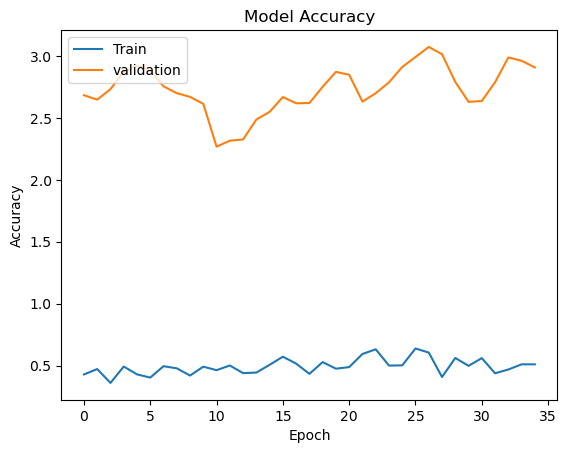

In [206]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [155]:
check_accuracy(model=model , loader= test_hrtz_dl , mode="test")

Checking accuracy on test data
Got 50 / 53 with accuracy 94.34


94.33962264150944

In [197]:
check_accuracy(model=model , loader= test_bids_dl , mode="test")

Checking accuracy on test data
Got 41 / 44 with accuracy 93.18


93.18181818181817

In [198]:
check_accuracy(model=model , loader= general_dl , mode="test")

Checking accuracy on test data
Got 432 / 531 with accuracy 81.36


81.35593220338984

In [157]:
check_accuracy(model=model , loader= train_dl , mode="test")

Checking accuracy on test data
Got 1020 / 1124 with accuracy 90.75


90.74733096085409

In [158]:
check_accuracy(model=model , loader= valid_dl , mode="test")

Checking accuracy on test data
Got 182 / 198 with accuracy 91.92


91.91919191919192

In [159]:
check_accuracy(model=model , loader= valid_screen_dl , mode="test")

Checking accuracy on test data
Got 85 / 96 with accuracy 88.54


88.54166666666666

AttributeError: 'AngleDataset' object has no attribute 'classes'

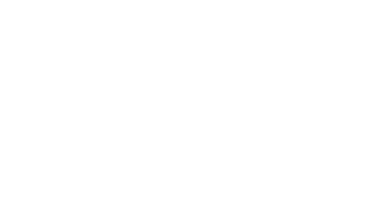

In [17]:
visualize_model(model, valid_dl, device)

## inference

In [54]:
model.load_state_dict(torch.load('checkpoints/angles_best_model_epoch_'+str(12)+'.pth'))
# model.load_state_dict(torch.load('checkpoints/0_epoch.pth'))
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((sz, sz)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

])

def angle(imgAddr):
    img = Image.open(imgAddr).convert('RGB')
    # print("cccc " , img.size)
    img = transform(img)
    img = img.unsqueeze(0).to(device)
    # print("hhh " , img.shape)
    with torch.no_grad():
        return model(img)

In [55]:
angle("test_tmp_images/ss.jpg")

tensor([[6.2358]], device='cuda:0')